In [6]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [7]:
%matplotlib inline

In [8]:
con_dist = pd.read_csv("condom_dist_u.csv", index_col = "Community Area Name")
mgon = pd.read_csv("gonorrhea_males.csv", index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [9]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area
con_dist_group.dropna(inplace = True) #get rid of all blank rows
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) #rename # of condom centers column to be more clear
con_dist_group.head(5)

,Number_of_Condom_Centers
Community Area Name,
Archer Heights,1
Auburn Gresham,2
Austin,8
Belmont Cragin,2
Beverly,1


In [10]:
con_mgon_merged = con_dist_group.join(mgon) #merge condom distribution centers and male gonorrhea datasets
con_mgon_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_mgon_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_mgon_merged

,Number_of_Condom_Centers,Community Area,Cases 2000 Male 15-44,Incidence Rate 2000,Incidence Rate 2000 Lower CI,Incidence Rate 2000 Upper CI,Cases 2001 Male 15-44,Incidence Rate 2001,Incidence Rate 2001 Lower CI,Incidence Rate 2001 Upper CI,...,Incidence Rate 2012 Upper CI,Cases 2013 Male 15-44,Incidence_Rate_2013,Incidence Rate 2013 Lower CI,Incidence Rate 2013 Upper CI,Cases 2014 Male 15-44,Incidence_Rate_2014,Incidence Rate 2014 Lower CI,Incidence Rate 2014 Upper CI,WARNING
Community Area Name,,,,,,,,,,,,,,,,,,,,,
Archer Heights,1,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,152.0,49.4,354.7,Rate and confidence interval estimates for yea...
Auburn Gresham,2,71.0,329.0,3254.8,2903.1,3606.5,289.0,2912.4,2576.6,3248.2,...,1990.0,130.0,1574.8,1304.1,1845.5,112,1356.8,1105.5,1608.1,NaN
Austin,8,25.0,660.0,2854.4,2636.6,3072.2,602.0,2652.9,2441.0,2864.8,...,2099.0,348.0,1848.9,1654.6,2043.2,225,1195.4,1039.2,1351.6,NaN
Belmont Cragin,2,19.0,9.0,45.9,21.0,87.1,25.0,127.9,82.8,188.8,...,217.3,25.0,130.4,84.4,192.5,24,125.2,80.2,186.3,Rate and confidence interval estimates for yea...
Beverly,1,72.0,34.0,820.9,568.5,1147.1,28.0,688.1,457.2,994.5,...,1428.3,9.0,264.1,120.8,501.3,10,293.4,140.7,539.6,Rate and confidence interval estimates for yea...
Brighton Park,2,58.0,9.0,75.3,34.4,142.9,11.0,92.5,46.2,165.5,...,195.5,9.0,79.1,36.2,150.2,12,105.5,54.5,184.3,Rate and confidence interval estimates for yea...
Calumet Heights,2,48.0,68.0,2485.4,1930.0,3150.8,48.0,1791.7,1321.1,2375.5,...,1974.5,14.0,645.5,352.9,1083.0,24,1106.5,709.0,1646.4,Rate and confidence interval estimates for yea...
Chatham,3,44.0,156.0,2432.6,2050.9,2814.3,133.0,2116.5,1756.8,2476.2,...,2311.6,92.0,1797.2,1448.8,2204.1,73,1426.1,1117.8,1793.1,NaN
Chicago Lawn,1,66.0,186.0,1324.4,1134.1,1514.7,219.0,1577.7,1368.7,1786.7,...,1358.0,114.0,918.2,749.6,1086.8,84,676.6,539.7,837.7,NaN


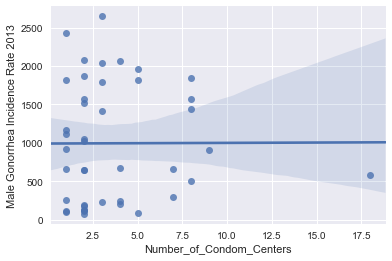

In [12]:
graph15 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2013", data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph15.set_ylabel("Male Gonorrhea Incidence Rate 2013") #fix y axis label

In [13]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.024
Method:                  Least Squares   F-statistic:                 0.0005144
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.982
Time:                         20:23:00   Log-Likelihood:                -346.04
No. Observations:                   43   AIC:                             696.1
Df Residuals:                       41   BIC:                             699.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  992.1829    178.356      5.563      0.000     631.985    1352.381
Number_of_Condom_Centers     0.8355     36.838      0.023      0.982     -73.560      75.231
==============================================================================
Omnibus:                        8.704   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.392
Skew:                           0.385   Prob(JB):                        0.183
Kurtosis:                       1.860   Cond. No.                         7.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

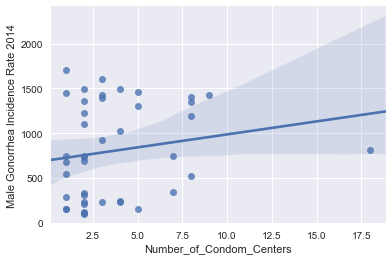

In [11]:
graph16 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2014", data = con_mgon_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph16.set_ylabel("Male Gonorrhea Incidence Rate 2014") #fix y axis label

In [14]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_mgon_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     1.303
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.261
Time:                         20:23:11   Log-Likelihood:                -321.95
No. Observations:                   42   AIC:                             647.9
Df Residuals:                       40   BIC:                             651.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  697.0430    124.198      5.612      0.000     446.029     948.057
Number_of_Condom_Centers    28.9477     25.364      1.141      0.261     -22.316      80.211
==============================================================================
Omnibus:                       22.174   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.849
Skew:                           0.205   Prob(JB):                        0.146
Kurtosis:                       1.575   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""